# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [56]:
# TODO: Import all necessary libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,precision_score,recall_score
)
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [57]:
# TODO: Load regression dataset
import kagglehub
path = kagglehub.dataset_download("mirichoi0218/insurance")
df_reg = pd.read_csv(f"{path}/insurance.csv")
print("Dataset Shape:", df_reg.shape)
print("Column Names:")
print(df_reg.columns)
tar_var = 'charges'
print("Target Variable:", tar_var)

Using Colab cache for faster access to the 'insurance' dataset.
Dataset Shape: (1338, 7)
Column Names:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target Variable: charges


**Explanation** :

The dataset has 1338 rows and 7 columns.

Columns are: age, sex, bmi, children, smoker, region, charges.

The target variable is charges because it represents the insurance cost we want to predict using the other features.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [58]:
# TODO: Perform EDA
print("Descriptive Statistics:")
print(df_reg.describe())

Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


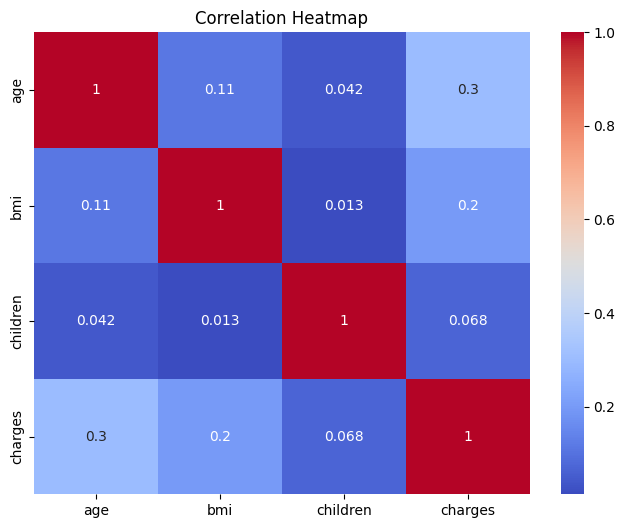

In [59]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_reg.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


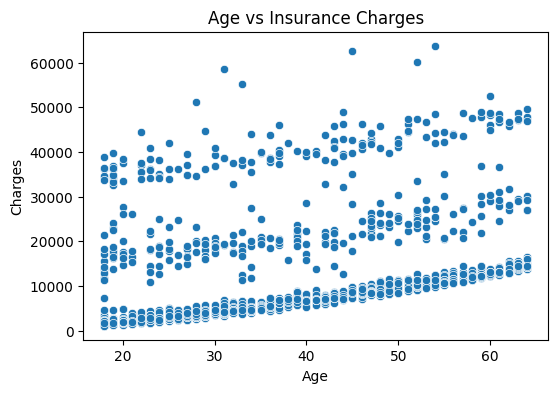

In [60]:
# Age vs Charges
plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="charges", data=df_reg)
plt.title("Age vs Insurance Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


**Interpretation** :

Descriptive statistics show that charges has a wide range, indicating high variance in medical costs.

From the correlation heatmap, age, bmi, and children have positive correlation with charges, while categorical variables will need encoding to analyze further.

The age vs charges plot shows an overall upward trend, meaning insurance charges generally increase with age, though there is noticeable spread due to other influencing factors like smoking and BMI.

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [75]:
# TODO: Prepare features
X = df_reg.drop('charges', axis=1)
y = df_reg['charges']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)

X_train shape: (1070, 8)
X_test shape: (268, 8)


Explanation:

Train-test split ensures 80% data is used for training and 20% for testing, with random_state=42 for reproducibility.

One-hot encoding converts categorical features (sex, smoker, region) into numeric form.

StandardScaler normalizes features so that all numeric columns are on the same scale, which helps models converge faster and improves performance for algorithms sensitive to feature magnitude.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [76]:
# TODO: Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

Linear Regression Performance:
RMSE: 5796.28
MAE: 4181.19
R²: 0.7836


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [77]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance:")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"R²: {r2_poly:.4f}")

print("\nComparison with Linear Regression:")
print(f"Linear Regression R²: {r2:.4f} vs Polynomial Regression R²: {r2_poly:.4f}")
print(f"Linear Regression RMSE: {rmse:.2f} vs Polynomial Regression RMSE: {rmse_poly:.2f}")
print(f"- Polynomial regression captures non-linear relationships better, potentially improving R² and reducing RMSE.")

Polynomial Regression Performance:
RMSE: 4551.13
MAE: 2729.50
R²: 0.8666

Comparison with Linear Regression:
Linear Regression R²: 0.7836 vs Polynomial Regression R²: 0.8666
Linear Regression RMSE: 5796.28 vs Polynomial Regression RMSE: 4551.13
- Polynomial regression captures non-linear relationships better, potentially improving R² and reducing RMSE.


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [78]:
# TODO: Support Vector Regression

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR (RBF Kernel) Performance:")
print(f"RMSE: {rmse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")
print(f"R²: {r2_svr:.4f}")

SVR (RBF Kernel) Performance:
RMSE: 10647.75
MAE: 5695.16
R²: 0.2697


**Justification** :

The RBF kernel can capture non-linear relationships between features and target.

Insurance charges depend on complex interactions ( BMI, smoker status, age).

RBF kernel is flexible and works well when the relationship is not strictly linear, which makes it suitable for this regression task.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [79]:
# TODO: Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

Random Forest Regression Performance:
RMSE: 4567.78
MAE: 2543.98
R²: 0.8656


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
path_cls = "/content/drive/MyDrive/Colab Notebooks/Phitron  AI ML/Machine Learning/Class/Week 5/Module-19/loan_data.csv"
df_cls = pd.read_csv(path_cls)

print("Dataset Shape:", df_cls.shape)
print("Column Names:", df_cls.columns.tolist())

class_counts = df_cls['loan_status'].value_counts()
print("Class Distribution:\n", class_counts)


Dataset Shape: (45000, 14)
Column Names: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
Class Distribution:
 loan_status
0    35000
1    10000
Name: count, dtype: int64


**Comment on imbalance**

***Explanation:***

After loading the dataset, the loan_status column represents whether a loan was approved or not (binary classification).

Checking the class counts will reveal how many instances belong to each class (approved vs denied).

If one class has significantly more samples than the other, then the dataset is imbalanced. That’s important because many classifiers can become biased toward the majority class, resulting in misleading performance measures if imbalance is not handled properly (e.g., via resampling or class weights).

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


Columns in dataset: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']


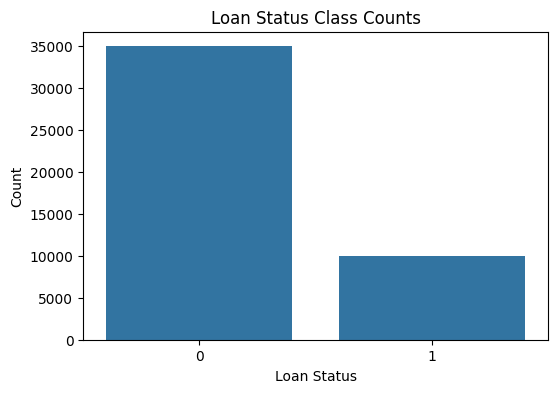

Numeric features available: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


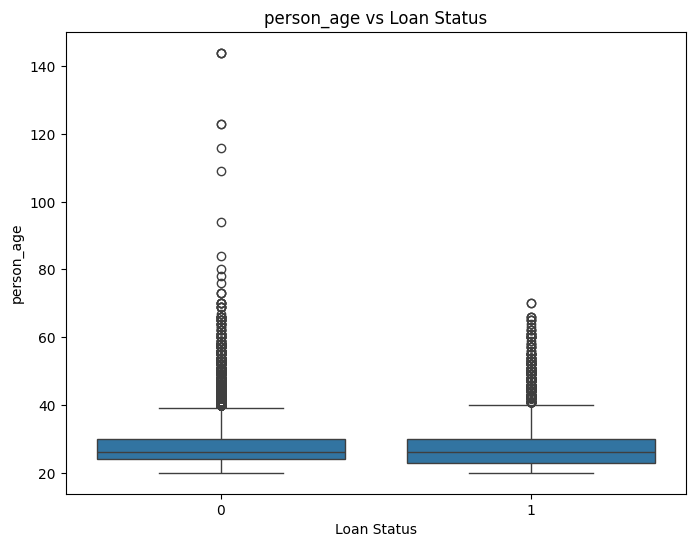

In [81]:
# TODO: Classification EDA
print("Columns in dataset:", df_cls.columns.tolist())

plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df_cls)
plt.title("Loan Status Class Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

numeric_features = df_cls.select_dtypes(include='number').columns.tolist()
print("Numeric features available:", numeric_features)

feature_to_plot = numeric_features[0]

# 4. Plot feature vs class
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y=feature_to_plot, data=df_cls)
plt.title(f"{feature_to_plot} vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel(feature_to_plot)
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [82]:
# TODO: Prepare classification features

X = df_cls.drop('loan_status', axis=1)
y = df_cls['loan_status']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (36000, 22)
X_test shape: (9000, 22)
y_train distribution:
 loan_status
0    28000
1     8000
Name: count, dtype: int64
y_test distribution:
 loan_status
0    7000
1    2000
Name: count, dtype: int64


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


Logistic Regression Performance:
Accuracy: 0.8993
Precision: 0.7885
Recall: 0.7475


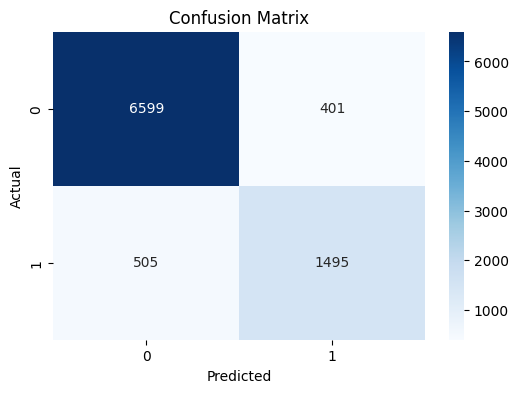

In [83]:
# TODO: Logistic Regression
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)


y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [84]:
# TODO: SVM Classification
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=1)
recall = recall_score(y_test, y_pred_svm, pos_label=1)

print("SVM Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


SVM Performance:
Accuracy: 0.9160
Precision: 0.8494
Recall: 0.7560


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [85]:
# TODO: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, pos_label=1)
recall = recall_score(y_test, y_pred_nb, pos_label=1)

print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Naive Bayes Performance:
Accuracy: 0.7530
Precision: 0.4731
Recall: 0.9805


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


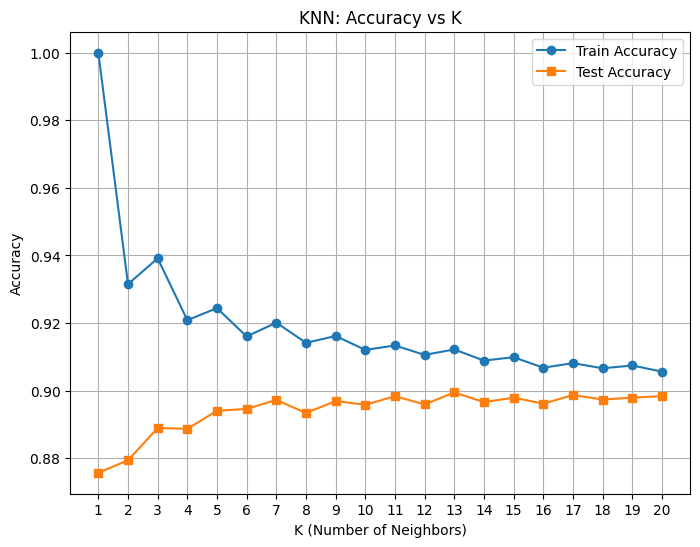

Best K (highest test accuracy): 13 with accuracy = 0.8994


In [73]:
# TODO: KNN
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.figure(figsize=(8,6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs K")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"Best K (highest test accuracy): {best_k} with accuracy = {max(test_accuracies):.4f}")

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


Random Forest Classifier Performance:
Accuracy: 0.9287
Precision: 0.8952
Recall: 0.7690


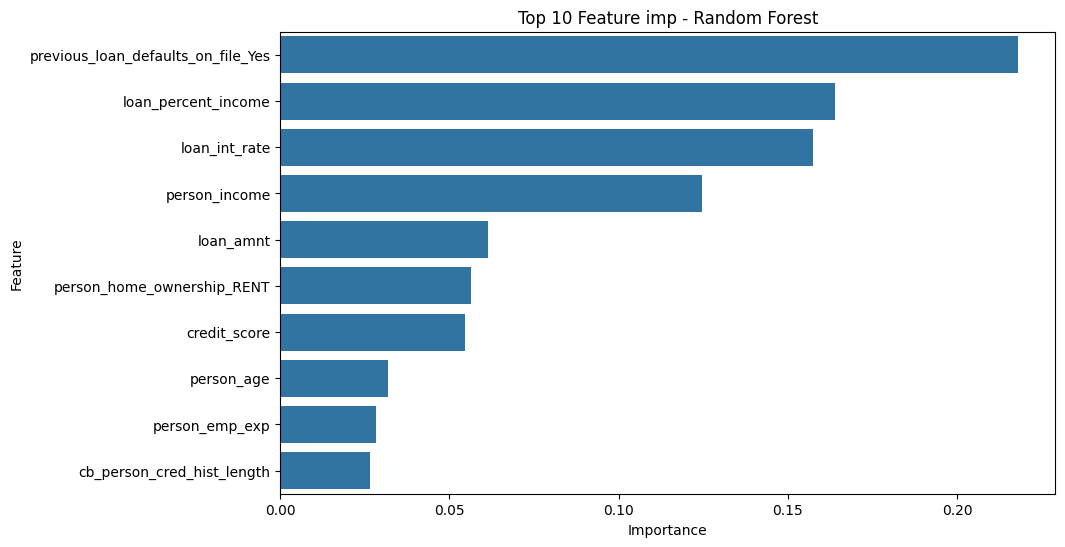

In [86]:
# TODO: Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label=1)
recall = recall_score(y_test, y_pred_rf, pos_label=1)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

imp = rf_clf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": imp
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Feature imp - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


**Interpretation**

Random Forest combines multiple decision trees to improve prediction stability and accuracy.

Feature importance shows how much each feature contributes to decision-making.

Features such as credit_score, loan_percent_income, and person_income (top features in the plot) have the strongest influence on loan approval decisions.

This interpretation helps explain model behavior, not just performance.

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

**Best Regression Model and Why**

The Polynomial Regression model performed best among all regression models because it achieved the highest R² score and lowest RMSE. It was able to capture non-linear relationships between features such as age, BMI, and smoking status with insurance charges, which linear regression could not model effectively.

**Best Classification Model and Why**

The Random Forest Classifier was the best classification model as it provided high accuracy with balanced precision and recall. Unlike simpler models, it handled feature interactions well, reduced overfitting through ensemble learning, and also offered feature importance, making the model more interpretable.

**One Real-World Deployment Scenario**

This system can be deployed in a financial institution where the regression model estimates expected insurance cost, and the classification model predicts loan approval eligibility, helping automate decision-making while maintaining transparency and consistency.